In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# EJ 1

In [ ]:
# Item A
A = np.array([[1/3,1/2,1/2,0],[1/3,1/2,0,0],[1/3,0,1/2,0],[0,0,0,1]])
print(A)

[[0.33333333 0.5        0.5        0.        ]
 [0.33333333 0.5        0.         0.        ]
 [0.33333333 0.         0.5        0.        ]
 [0.         0.         0.         1.        ]]


In [ ]:
e = np.linalg.eig(A)
print(e[0])
print(e[1])

[-0.16666667  1.          0.5         1.        ]
[[-8.16496581e-01  7.27606875e-01  1.17756934e-16  0.00000000e+00]
 [ 4.08248290e-01  4.85071250e-01 -7.07106781e-01  0.00000000e+00]
 [ 4.08248290e-01  4.85071250e-01  7.07106781e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [ ]:
w1 = e[1][:,1]
w1 = w1/np.linalg.norm(w1,1)
print('w1 = ',w1)

w2 = e[1][:,3]
w2 = w2/np.linalg.norm(w2,1)
print('w2 =',w2)

A_inf = np.c_[w1,w1,w1,w2]

print('La matriz inf sera =')
print(A_inf)

w1 =  [0.42857143 0.28571429 0.28571429 0.        ]
w2 = [0. 0. 0. 1.]
La matriz inf sera =
[[0.42857143 0.42857143 0.42857143 0.        ]
 [0.28571429 0.28571429 0.28571429 0.        ]
 [0.28571429 0.28571429 0.28571429 0.        ]
 [0.         0.         0.         1.        ]]


In [ ]:
#chequeo por simulacion

def matriz_inf(A,k):
  A_old = A.copy()
  for i in range(k):
    A_new = A@A_old
    A_old = A_new
  return(A_new)

In [ ]:
matriz_inf(A,1000)

array([[0.42857143, 0.42857143, 0.42857143, 0.        ],
       [0.28571429, 0.28571429, 0.28571429, 0.        ],
       [0.28571429, 0.28571429, 0.28571429, 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [ ]:
#Item B

v0 = np.array([160,20,10,80])

In [ ]:
def estado(A,v,k):
  for i in range(k):
    v = A@v
  return(v)

In [ ]:
print('v3 = ', estado(A,v0,3))

v3 =  [81.06481481 55.09259259 53.84259259 80.        ]


In [ ]:
#Item C

lim = A_inf@v0
print('El estado limite para v0 =', lim)

El estado limite para v0 = [81.42857143 54.28571429 54.28571429 80.        ]


In [ ]:
#chequeo por simulacion
print(estado(A,v0,10))
print(estado(A,v0,100))
print(estado(A,v0,1000))
print(estado(A,v0,1001))

[81.42857273 54.29059645 54.28083082 80.        ]
[81.42857143 54.28571429 54.28571429 80.        ]
[81.42857143 54.28571429 54.28571429 80.        ]
[81.42857143 54.28571429 54.28571429 80.        ]


# EJ 2

In [ ]:
# Item C

A = np.array([[-1,0,-(2/3)],[0,1,0],[2/3,0,1]])
print(A)

[[-1.          0.         -0.66666667]
 [ 0.          1.          0.        ]
 [ 0.66666667  0.          1.        ]]


In [ ]:
D = np.array([[-1,0,0],[0,1,0],[0,0,1]])
print(D)
print(np.linalg.inv(D))

[[-1  0  0]
 [ 0  1  0]
 [ 0  0  1]]
[[-1. -0. -0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [ ]:
L = np.array([[0,0,0],[0,0,0],[2/3,0,0]])
print(L)

[[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.66666667 0.         0.        ]]


In [ ]:
U = np.array([[0,0,-(2/3)],[0,0,0],[0,0,0]])
print(U)

[[ 0.          0.         -0.66666667]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]


In [ ]:
A == (U+D+L)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [ ]:
M_i = (np.linalg.inv(D+(3/4)*L))@((1/4)*D - (3/4)*U)
print(M_i)

[[ 0.25   0.    -0.5  ]
 [ 0.     0.25   0.   ]
 [-0.125  0.     0.5  ]]


In [ ]:
print(np.linalg.eig(M_i)[0])

[0.0954915 0.6545085 0.25     ]


# EJ 3


In [ ]:
x = np.array([0.0,1.0,2.0,3.0,4.0,5.0])
y = np.array([40.0,27.5,19.8,15.0,6.1,3.8])

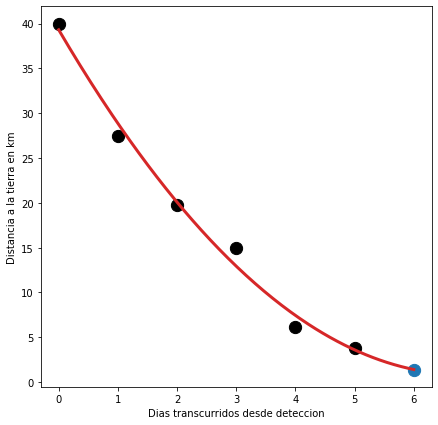

La distancia estimada para el dia 6 es =  1.4


In [ ]:
#Item A
A = np.c_[np.ones(len(x)),x,x**2]
c = np.linalg.solve(A.T@A,A.T@y)

xs = np.linspace(0,6,200)
ys = c[0] + c[1]*xs + c[2]*(xs**2)

estimadoA = c[0] + c[1]*6 + c[2]*(6**2)

plt.figure(figsize = (7,7))
plt.scatter(x,y,150,'k')
plt.scatter(6,estimadoA,150)
plt.plot(xs,ys,'C3',lw = 3)
plt.xlabel('Dias transcurridos desde deteccion')
plt.ylabel('Distancia a la tierra en km')
plt.show()
print('La distancia estimada para el dia 6 es = ', np.round(estimadoA,1))

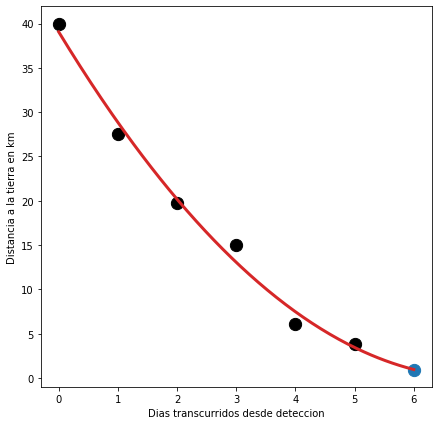

La distancia estimada para el dia 6 es =  0.9


In [ ]:
# Item B

#idea:
#y = (d0+d1x)**2
#sqrt(y) = d0+d1x -> hacer el ajuste y obtener d0,d1
#sqrt(y)**2 = (d0+d1x)**2
#y = (d0+d1x)**2

raiz_y = np.sqrt(y)

B = np.c_[np.ones(len(x)),x]
d = np.linalg.solve(B.T@B,B.T@raiz_y)

xss = np.linspace(0,6,200)
yss = (d[0]+d[1]*xss)**2

estimadoB = (d[0]+d[1]*6)**2

plt.figure(figsize = (7,7))
plt.scatter(x,y,150,'k')
plt.scatter(6,estimadoB,150)
plt.plot(xss,yss,'C3',lw = 3)
plt.xlabel('Dias transcurridos desde deteccion')
plt.ylabel('Distancia a la tierra en km')
plt.show()
print('La distancia estimada para el dia 6 es = ', np.round(estimadoB,1))

In [ ]:
#Item C
print('Primer ajuste = ', estimadoA)
print('Segundo ajuste = ',estimadoB)

Primer ajuste =  1.399999999999931
Segundo ajuste =  0.9490787245434223
